In [2]:
#### Pipeline Stage 4: Visualization #####
import pandas as pd

climate_mitigation_flattened = pd.read_hdf('../output/climate_mitigation_flattened.h5')
climate_adaption_flattened = pd.read_hdf('../output/climate_adaption_flattened.h5')
water_flattened = pd.read_hdf('../output/water_flattened.h5')
circular_economy_flattened = pd.read_hdf('../output/circular_economy_flattened.h5')
pollution_prevention_flattened = pd.read_hdf('../output/pollution_prevention_flattened.h5')
biodiversity_flattened = pd.read_hdf('../output/biodiversity_flattened.h5')

concatinated_taxonomy = pd.concat(
    [
        climate_mitigation_flattened,
        climate_adaption_flattened,
        water_flattened,
        circular_economy_flattened,
        pollution_prevention_flattened,
        biodiversity_flattened,
    ],
    axis=0,
)

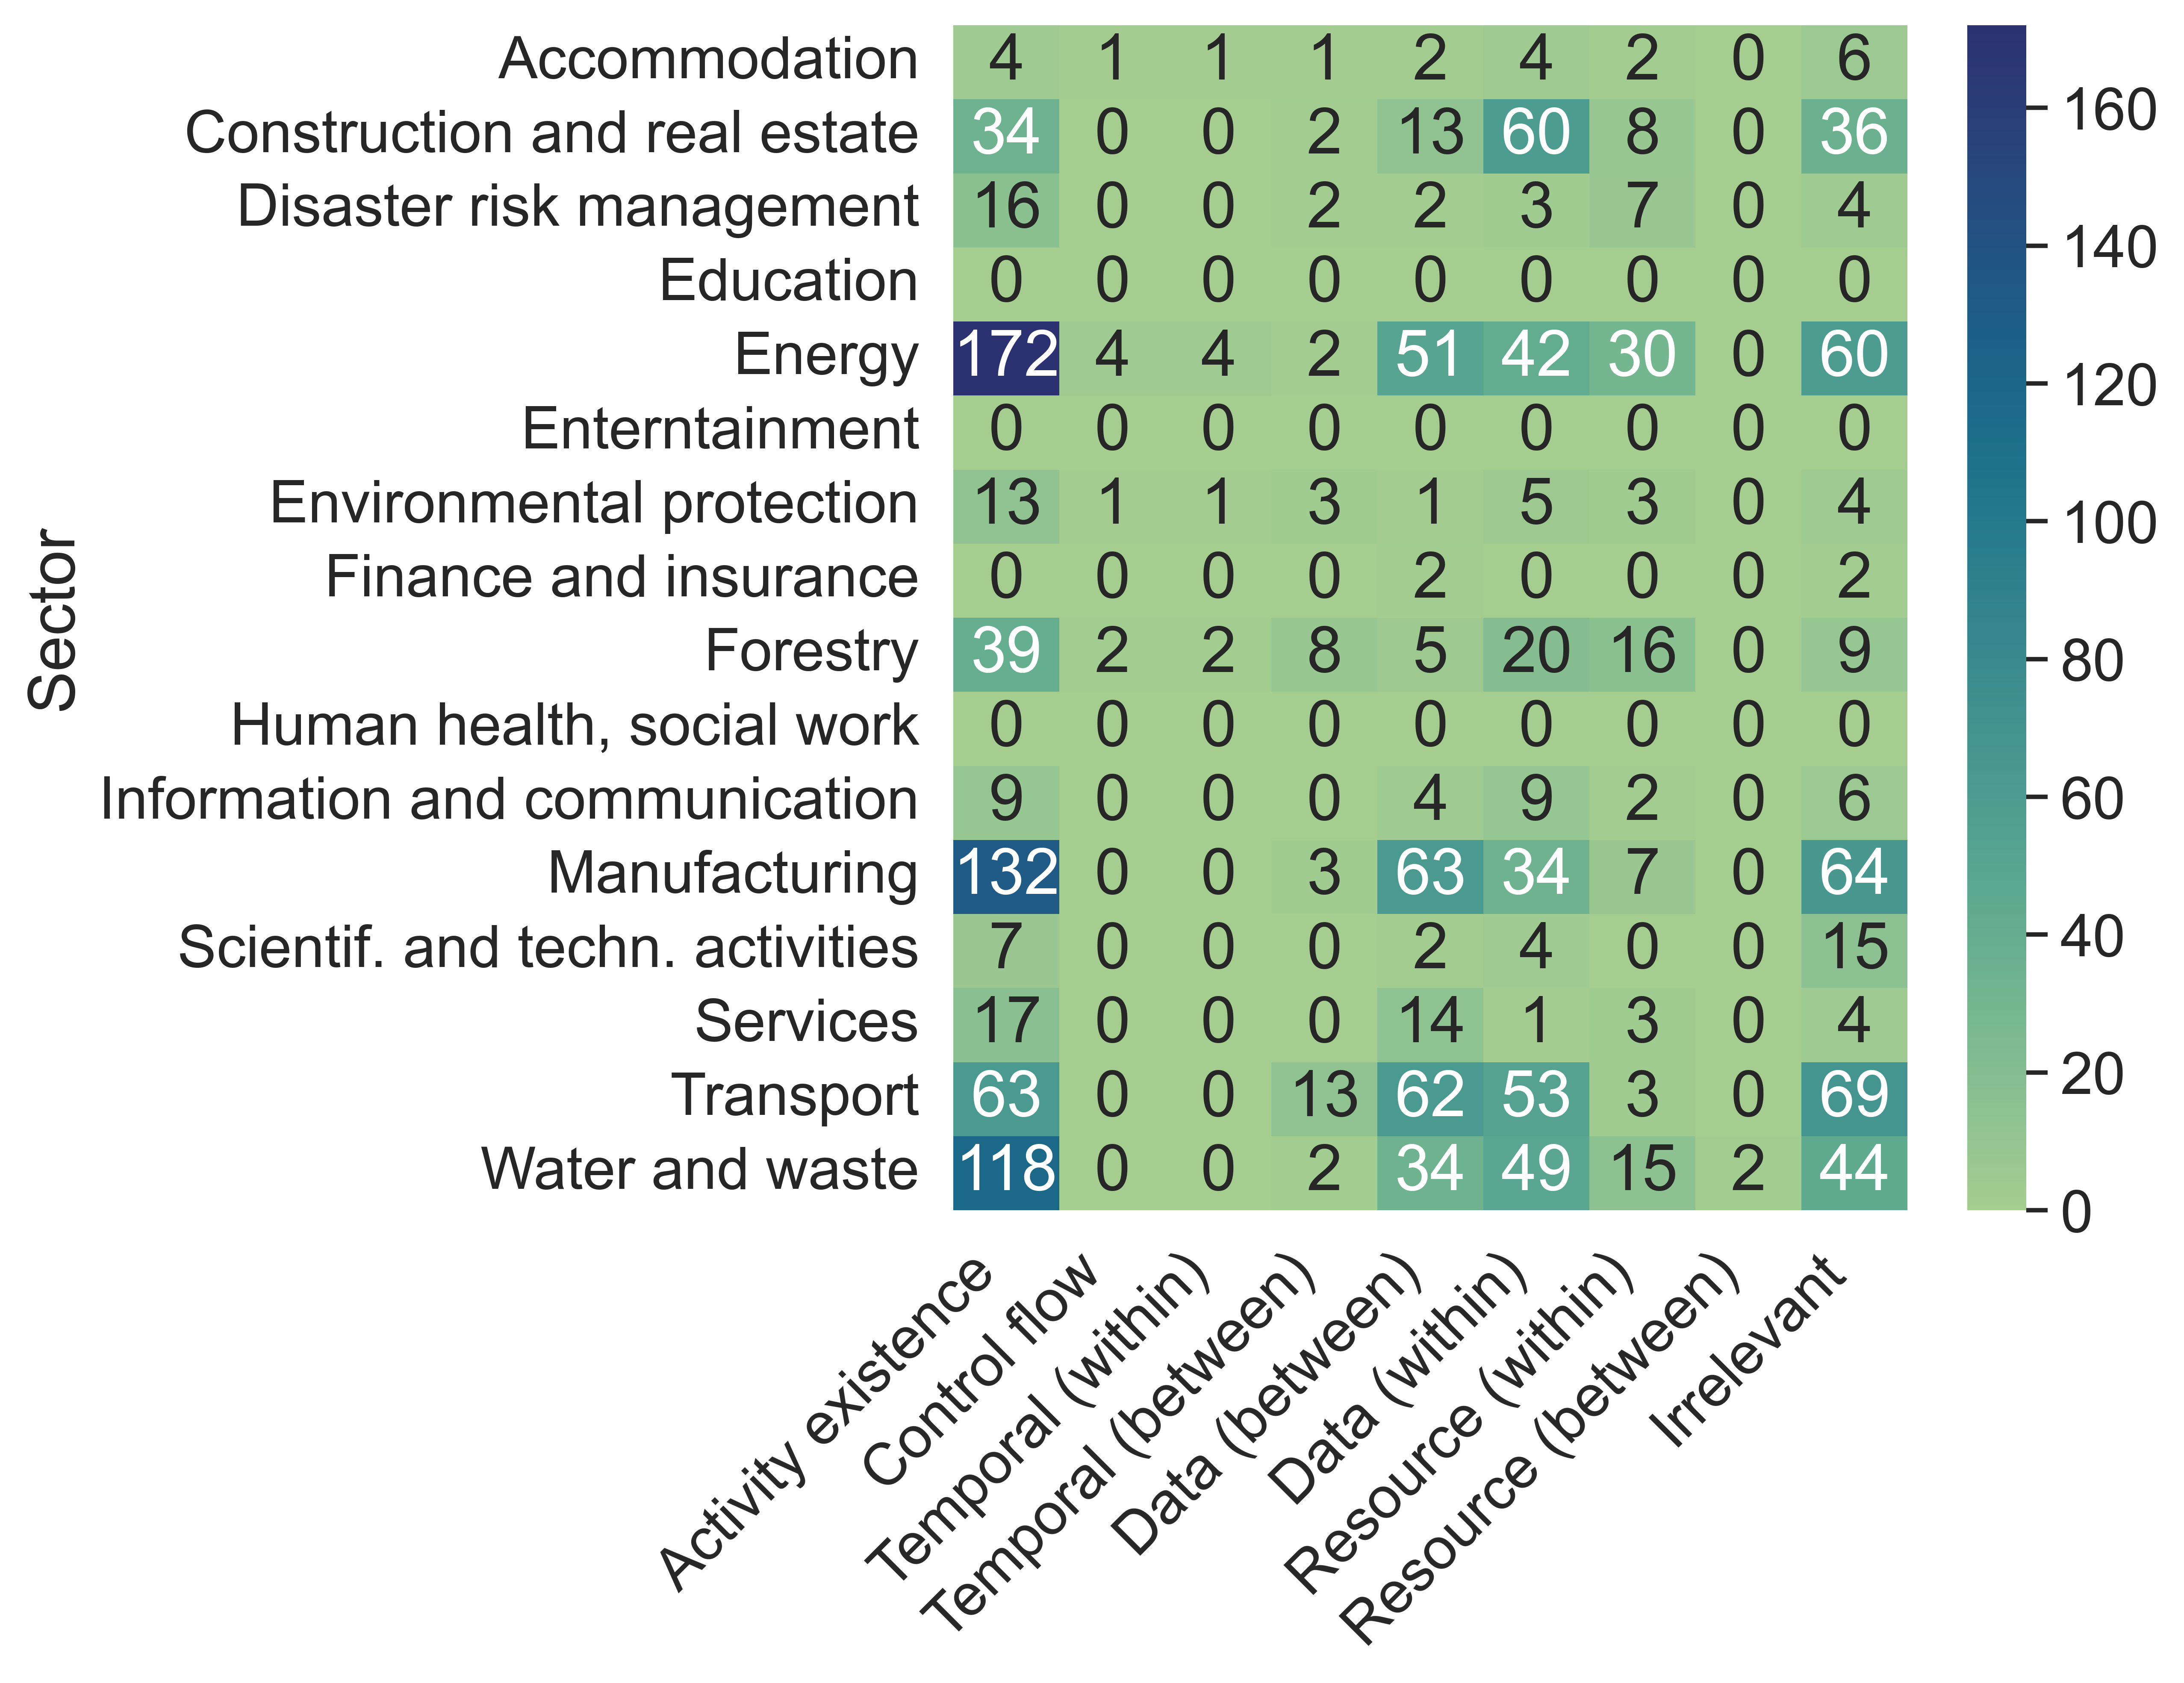

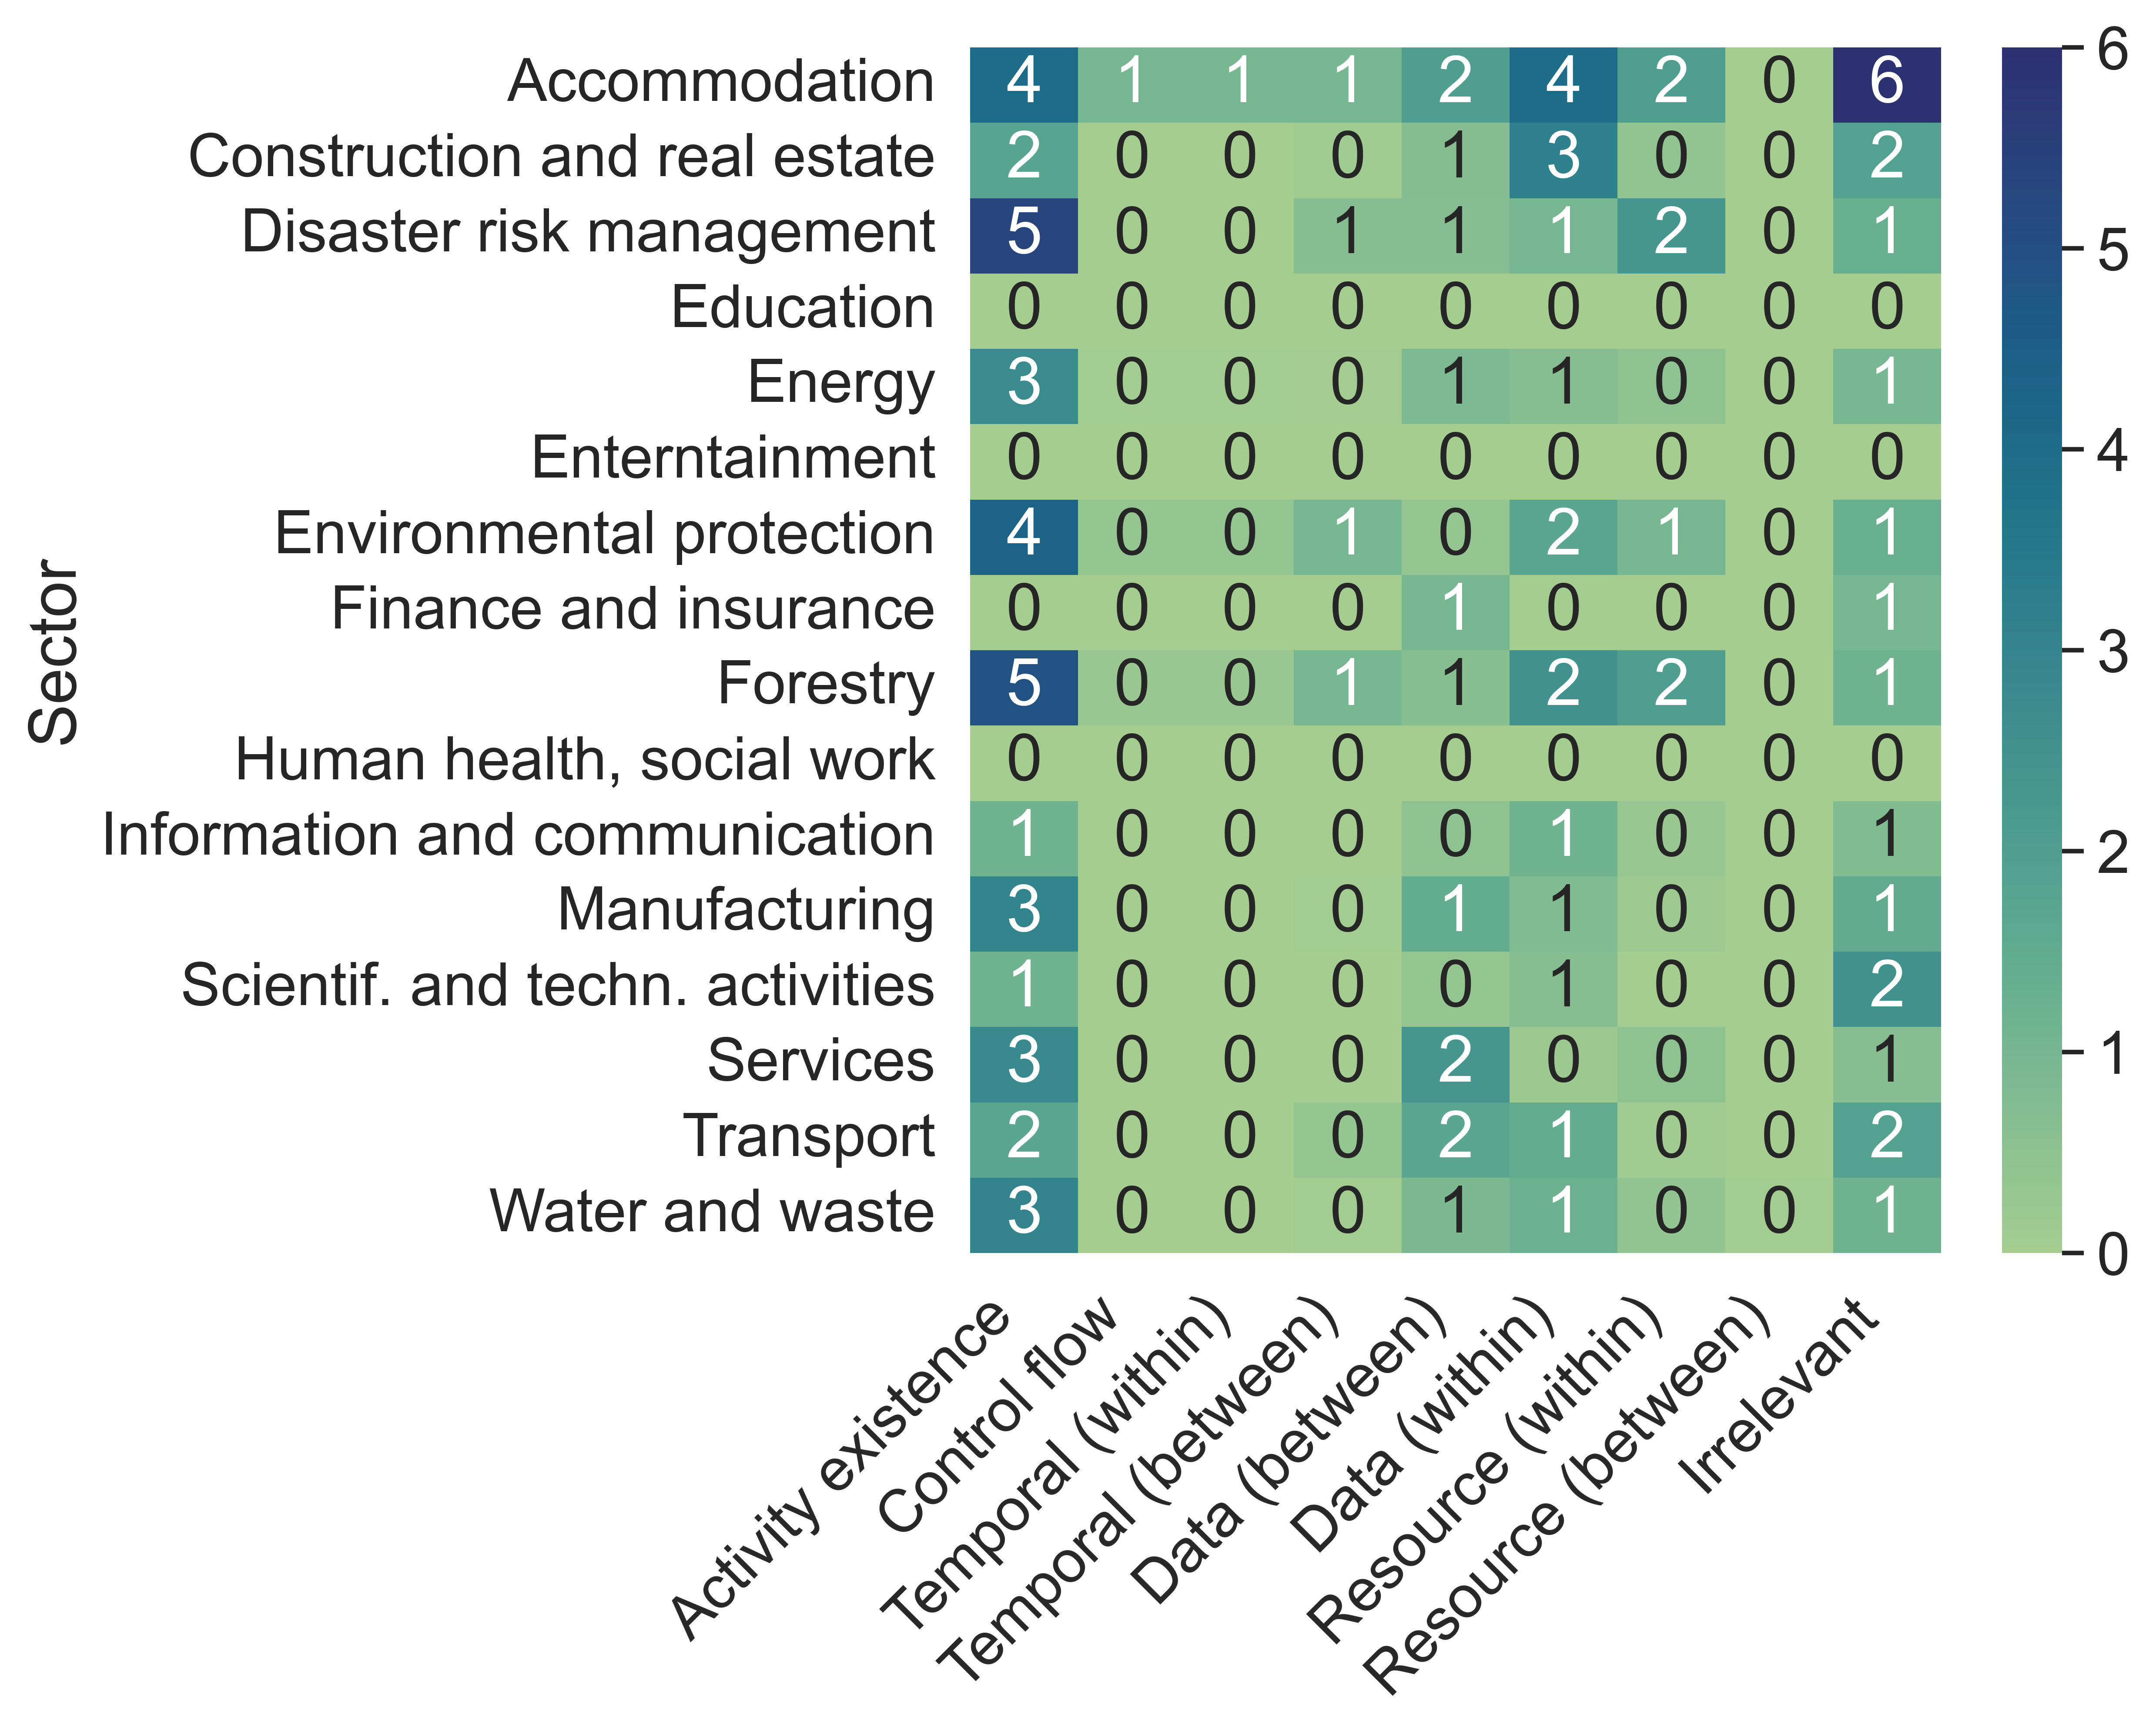

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(font_scale=1.5)

# Group by constraint type, sector

new_df = (
    concatinated_taxonomy.drop("nace", axis=1)
    .drop("goal", axis=1)
    .drop("activity", axis=1)
    .drop("number", axis=1)
)


cf_cols_within = [ # this is actually referring to activity existence constraint
    "adaption_control_flow_within",
    "substantial_control_flow_within",
    "mitigation_control_flow_within",
    "water_control_flow_within",
    "circular_control_flow_within",  
    "pollution_control_flow_within",
    "biodiversity_control_flow_within",
]
new_df["Activity existence"] = new_df[cf_cols_within].sum(axis=1)
new_df = new_df.drop(cf_cols_within, axis=1)

cf_cols_between = [
    "adaption_control_flow_between",
    "substantial_control_flow_between",
    "mitigation_control_flow_between",
    "water_control_flow_between",
    "circular_control_flow_between",
    "pollution_control_flow_between",
    "biodiversity_control_flow_between",
]
new_df["Control flow"] = new_df[cf_cols_between].sum(axis=1)
new_df = new_df.drop(cf_cols_between, axis=1)


tem_cols_within = [
    "adaption_temporal_within",
    "substantial_temporal_within",
    "mitigation_temporal_within",
    "water_temporal_within",
    "circular_temporal_within",
    "pollution_temporal_within",
    "biodiversity_temporal_within",
]
new_df["Temporal (within)"] = new_df[tem_cols_within].sum(axis=1)
new_df = new_df.drop(tem_cols_within, axis=1)

tem_cols_between = [
    "adaption_temporal_between",
    "substantial_temporal_between",
    "mitigation_temporal_between",
    "water_temporal_between",
    "circular_temporal_between",
    "pollution_temporal_between",
    "biodiversity_temporal_between",
]
new_df["Temporal (between)"] = new_df[tem_cols_between].sum(axis=1)
new_df = new_df.drop(tem_cols_between, axis=1)

data_cols_between = [
    "adaption_data_between",
    "substantial_data_between",
    "mitigation_data_between",
    "water_data_between",
    "circular_data_between",
    "pollution_data_between",
    "biodiversity_data_between",
]
new_df["Data (between)"] = new_df[data_cols_between].sum(axis=1)
new_df = new_df.drop(data_cols_between, axis=1)

data_cols_within= [
    "adaption_data_within",
    "substantial_data_within",
    "mitigation_data_within",
    "water_data_within",
    "circular_data_within",
    "pollution_data_within",
    "biodiversity_data_within",
]
new_df["Data (within)"] = new_df[data_cols_within].sum(axis=1)
new_df = new_df.drop(data_cols_within, axis=1)

resource_cols_within = [
    "adaption_resource_within",
    "substantial_resource_within",
    "mitigation_resource_within",
    "water_resource_within",
    "circular_resource_within",
    "pollution_resource_within",
    "biodiversity_resource_within",
]
new_df["Resource (within)"] = new_df[resource_cols_within].sum(axis=1)
new_df = new_df.drop(resource_cols_within, axis=1)


resource_cols_between = [
    "adaption_resource_between",
    "substantial_resource_between",
    "mitigation_resource_between",
    "water_resource_between",
    "circular_resource_between",
    "pollution_resource_between",
    "biodiversity_resource_between",
]
new_df["Resource (between)"] = new_df[resource_cols_between].sum(axis=1)
new_df = new_df.drop(resource_cols_between, axis=1)

irrelevant_cols = [
    "adaption_no_process_relation",
    "substantial_no_process_relation",
    "mitigation_no_process_relation",
    "water_no_process_relation",
    "circular_no_process_relation",
    "pollution_no_process_relation",
    "biodiversity_no_process_relation",
]
new_df["Irrelevant"] = new_df[irrelevant_cols].sum(axis=1)
new_df = new_df.drop(irrelevant_cols, axis=1)

new_df = new_df.rename(columns={"sector": "Sector"})

# Abbreviate sector names for better output
new_df['Sector'] = new_df['Sector'].replace({"Water supply, sewerage, waste management and remediation": "Water and waste",
                                             "Accommodation activities": "Accommodation", "Arts, entertainment and recreation": "Enterntainment",
                                             "Construction and real estate activities": "Construction and real estate",
                                             "Environmental protection and restoration activities": "Environmental protection",
                                             "Financial and insurance activities": "Finance and insurance",
                                             "Human health and social work activities": "Human health, social work",
                                             "Professional, scientific and technical activities": "Scientif. and techn. activities"})

sum_df = new_df.groupby("Sector").sum()
mean_df = new_df.groupby("Sector").mean()

# figsize=(6, 6) control width and height
# dpi = 600, I 
plt.figure(figsize=(6, 6), 
           dpi = 600)

plot_sum=sns.heatmap(sum_df, cmap="crest", annot=True, fmt="0.0f")
plot_sum=plot_sum.set_xticklabels(plot_sum.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
plt.savefig("constraint_types_detailed_per_sector_abbreviated.png")

plt.figure(figsize=(6, 6), 
           dpi = 600)

plot_mean=sns.heatmap(mean_df, cmap="crest", annot=True, fmt="0.0f")
plot_mean=plot_mean.set_xticklabels(plot_mean.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
plt.savefig("constraint_types_detailed_per_sector_abbreviated_mean.png")

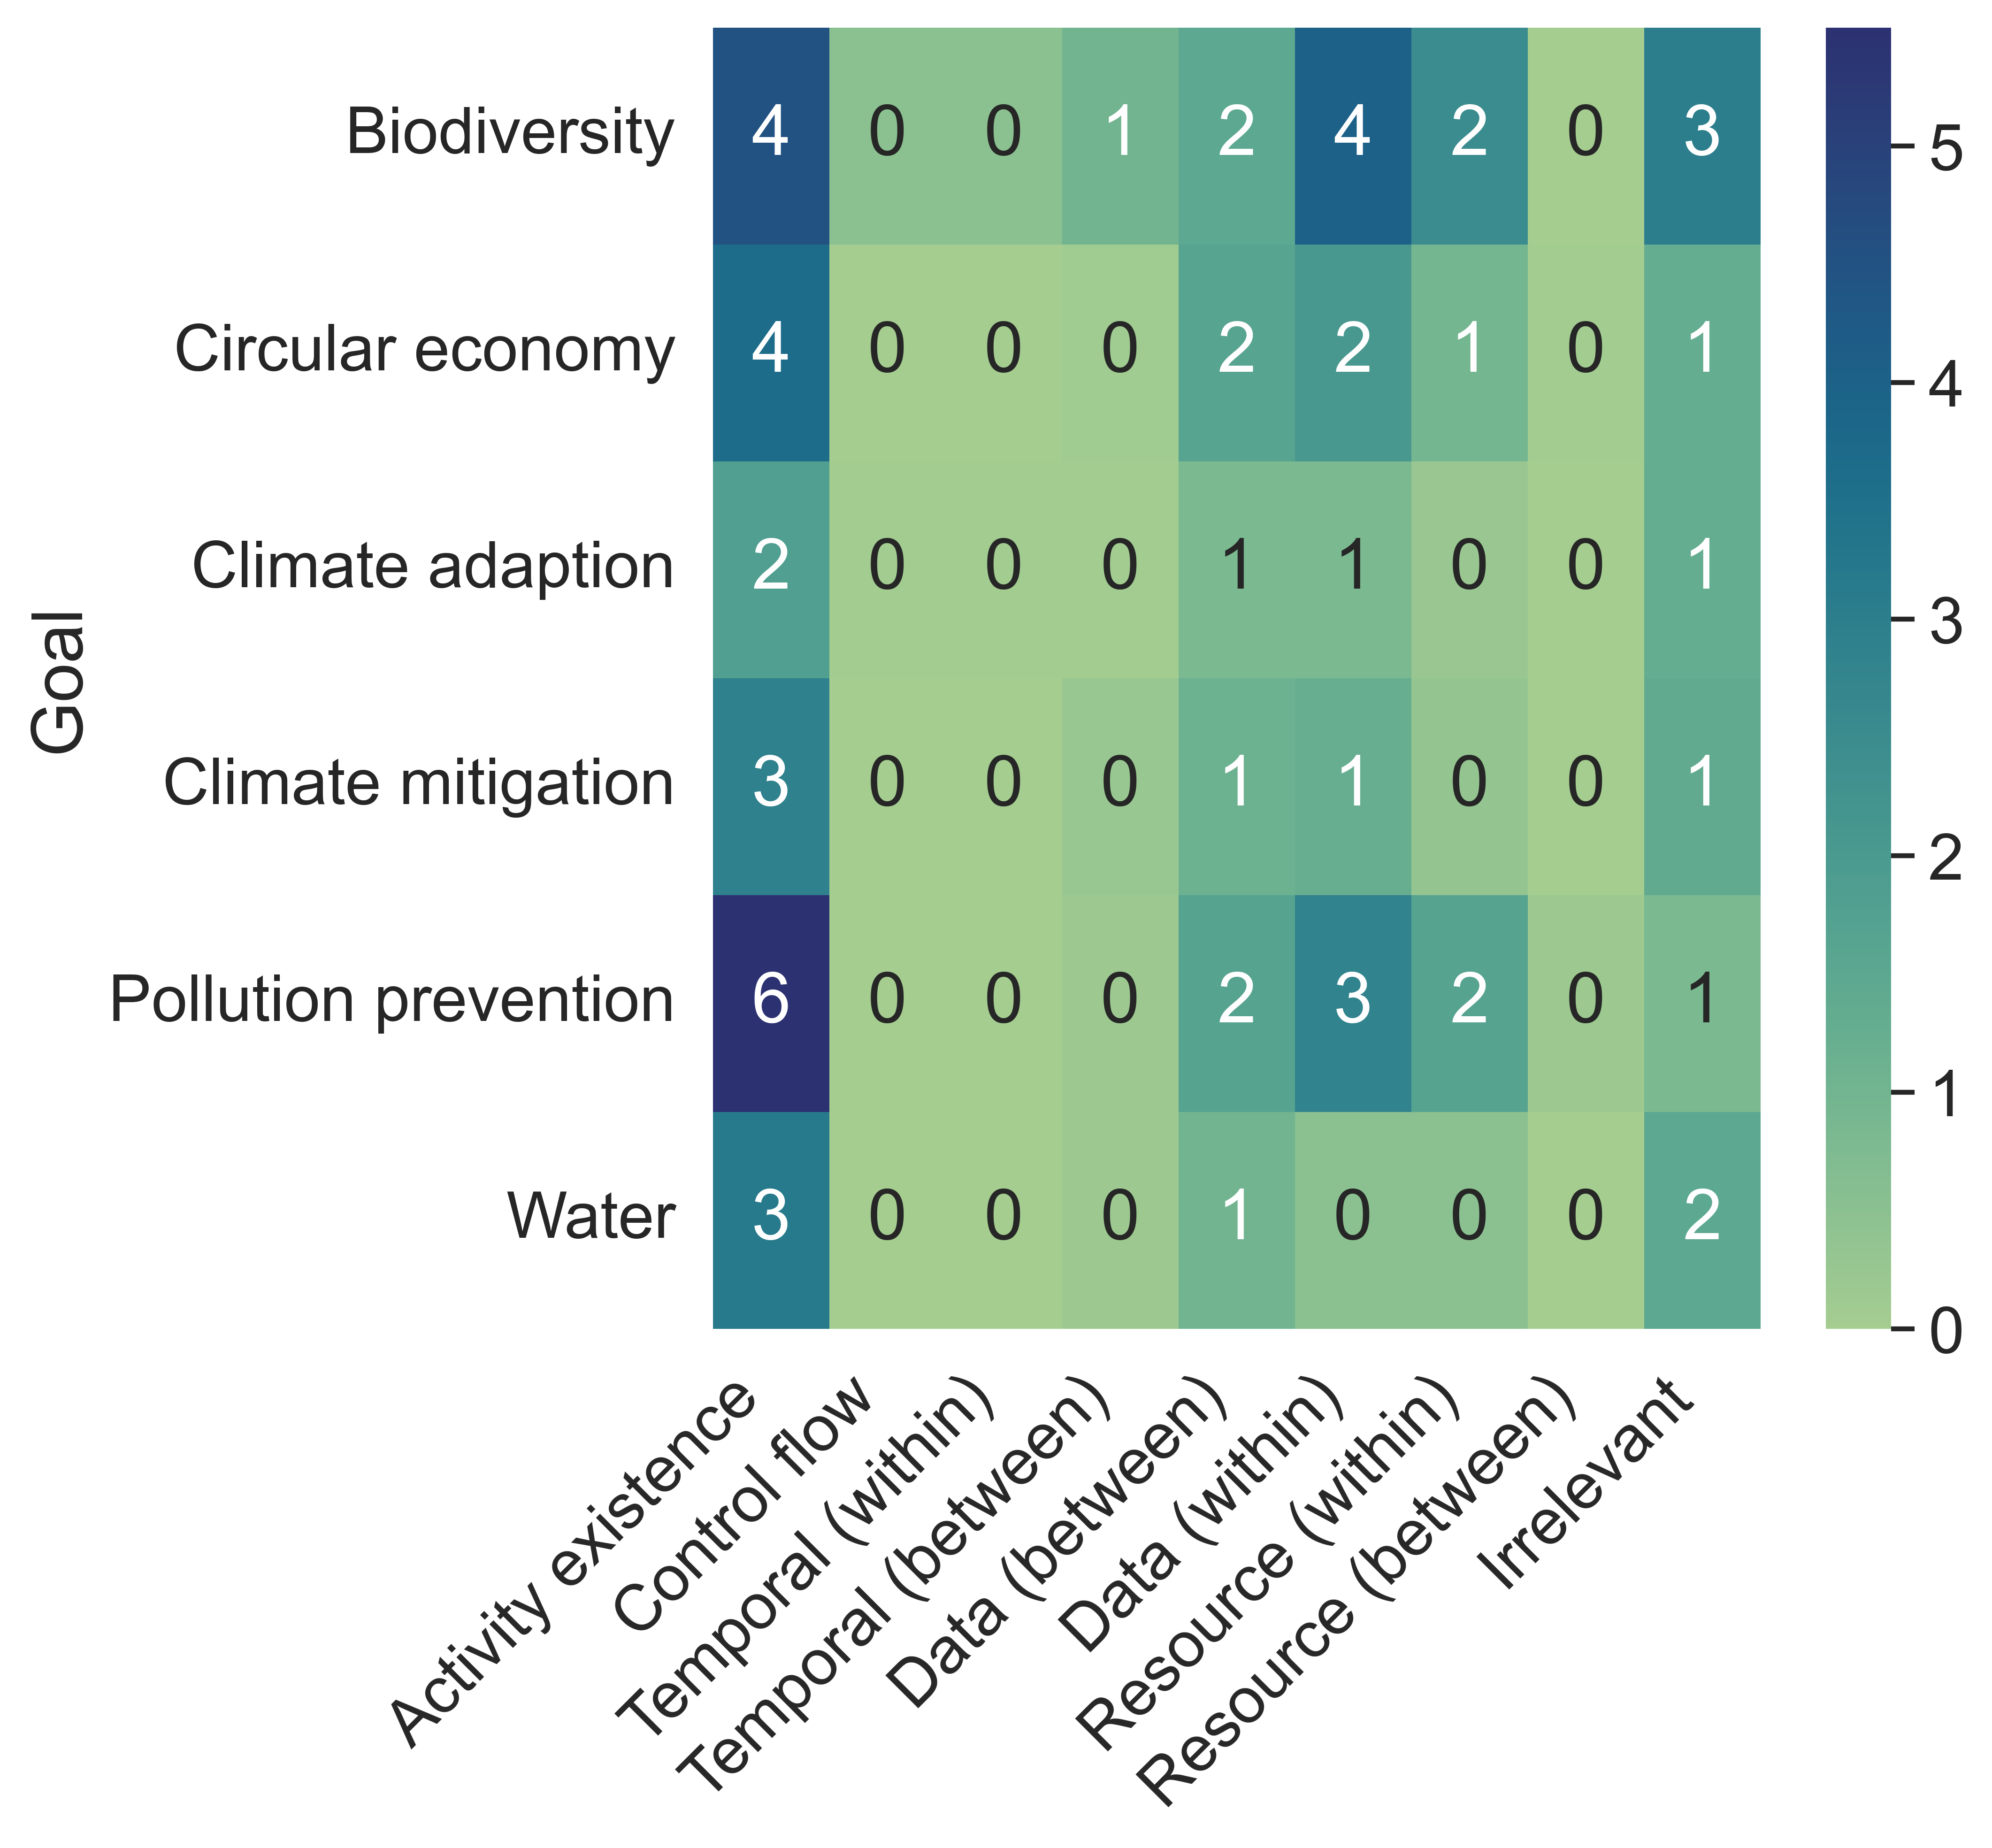

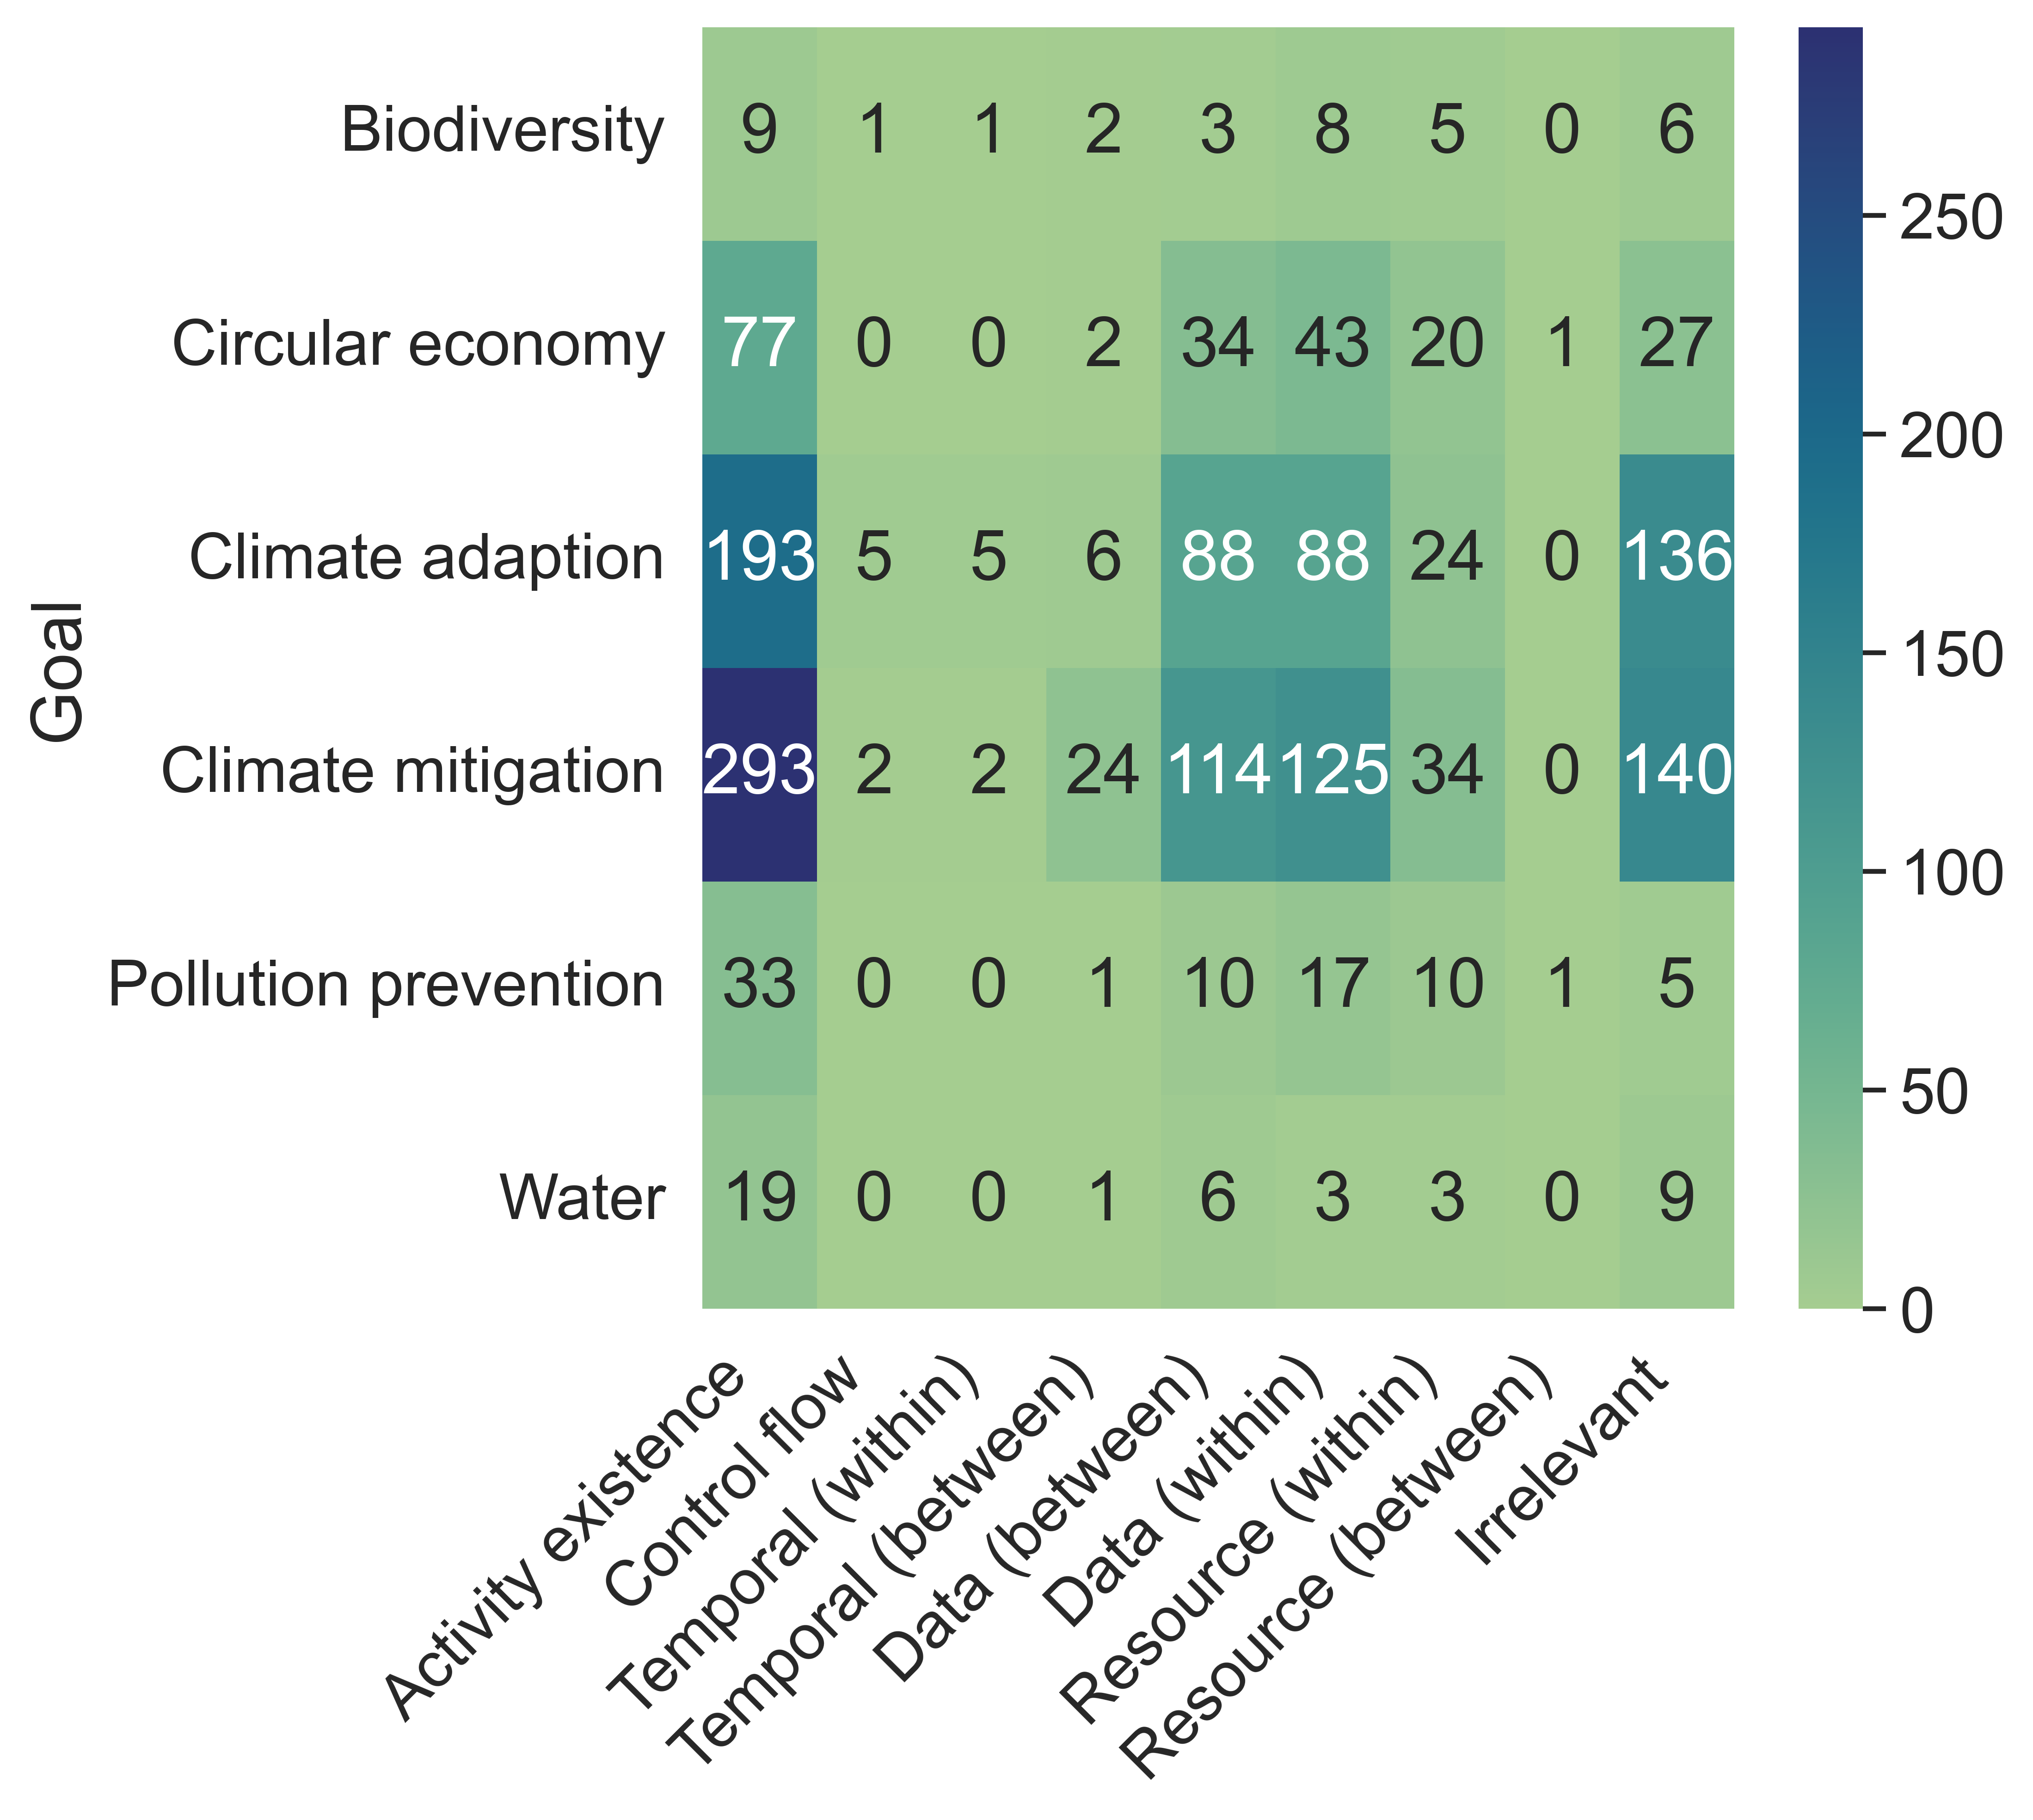

In [5]:
# Group by constraint type, goal

new_df = (
    concatinated_taxonomy.drop("nace", axis=1)
    .drop("sector", axis=1)
    .drop("activity", axis=1)
    .drop("number", axis=1)
)


cf_cols_within = [ # this is actually referring to activity existence constraint
    "adaption_control_flow_within",
    "substantial_control_flow_within",
    "mitigation_control_flow_within",
    "water_control_flow_within",
    "circular_control_flow_within",
    "pollution_control_flow_within",
    "biodiversity_control_flow_within",
]
new_df["Activity existence"] = new_df[cf_cols_within].sum(axis=1)
new_df = new_df.drop(cf_cols_within, axis=1)

cf_cols_between = [
    "adaption_control_flow_between",
    "substantial_control_flow_between",
    "mitigation_control_flow_between",
    "water_control_flow_between",
    "circular_control_flow_between",
    "pollution_control_flow_between",
    "biodiversity_control_flow_between",
]
new_df["Control flow"] = new_df[cf_cols_between].sum(axis=1)
new_df = new_df.drop(cf_cols_between, axis=1)


tem_cols_within = [
    "adaption_temporal_within",
    "substantial_temporal_within",
    "mitigation_temporal_within",
    "water_temporal_within",
    "circular_temporal_within",
    "pollution_temporal_within",
    "biodiversity_temporal_within",
]
new_df["Temporal (within)"] = new_df[tem_cols_within].sum(axis=1)
new_df = new_df.drop(tem_cols_within, axis=1)

tem_cols_between = [
    "adaption_temporal_between",
    "substantial_temporal_between",
    "mitigation_temporal_between",
    "water_temporal_between",
    "circular_temporal_between",
    "pollution_temporal_between",
    "biodiversity_temporal_between",
]
new_df["Temporal (between)"] = new_df[tem_cols_between].sum(axis=1)
new_df = new_df.drop(tem_cols_between, axis=1)

data_cols_between = [
    "adaption_data_between",
    "substantial_data_between",
    "mitigation_data_between",
    "water_data_between",
    "circular_data_between",
    "pollution_data_between",
    "biodiversity_data_between",
]
new_df["Data (between)"] = new_df[data_cols_between].sum(axis=1)
new_df = new_df.drop(data_cols_between, axis=1)

data_cols_within= [
    "adaption_data_within",
    "substantial_data_within",
    "mitigation_data_within",
    "water_data_within",
    "circular_data_within",
    "pollution_data_within",
    "biodiversity_data_within",
]
new_df["Data (within)"] = new_df[data_cols_within].sum(axis=1)
new_df = new_df.drop(data_cols_within, axis=1)

resource_cols_within = [
    "adaption_resource_within",
    "substantial_resource_within",
    "mitigation_resource_within",
    "water_resource_within",
    "circular_resource_within",
    "pollution_resource_within",
    "biodiversity_resource_within",
]
new_df["Resource (within)"] = new_df[resource_cols_within].sum(axis=1)
new_df = new_df.drop(resource_cols_within, axis=1)


resource_cols_between = [
    "adaption_resource_between",
    "substantial_resource_between",
    "mitigation_resource_between",
    "water_resource_between",
    "circular_resource_between",
    "pollution_resource_between",
    "biodiversity_resource_between",
]
new_df["Resource (between)"] = new_df[resource_cols_between].sum(axis=1)
new_df = new_df.drop(resource_cols_between, axis=1)

irrelevant_cols = [
    "adaption_no_process_relation",
    "substantial_no_process_relation",
    "mitigation_no_process_relation",
    "water_no_process_relation",
    "circular_no_process_relation",
    "pollution_no_process_relation",
    "biodiversity_no_process_relation",
]
new_df["Irrelevant"] = new_df[irrelevant_cols].sum(axis=1)
new_df = new_df.drop(irrelevant_cols, axis=1)

new_df = new_df.rename(columns={"goal": "Goal"})

# figsize=(6, 6) control width and height
# dpi = 600, I 
plt.figure(figsize=(6, 6), 
           dpi = 600) 

mean_df = new_df.groupby("Goal").mean()
sum_df = new_df.groupby("Goal").sum()

plot_mean=sns.heatmap(mean_df, cmap="crest", annot=True, fmt="0.0f")
plot_mean=plot_mean.set_xticklabels(plot_mean.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

plt.savefig("constraint_types_detailed_per_goal_mean.png")

plt.figure(figsize=(6, 6), 
           dpi = 600)

plot_sum=sns.heatmap(sum_df, cmap="crest", annot=True, fmt="0.0f")
plot_sum=plot_sum.set_xticklabels(plot_sum.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

plt.savefig("constraint_types_detailed_per_goal.png")

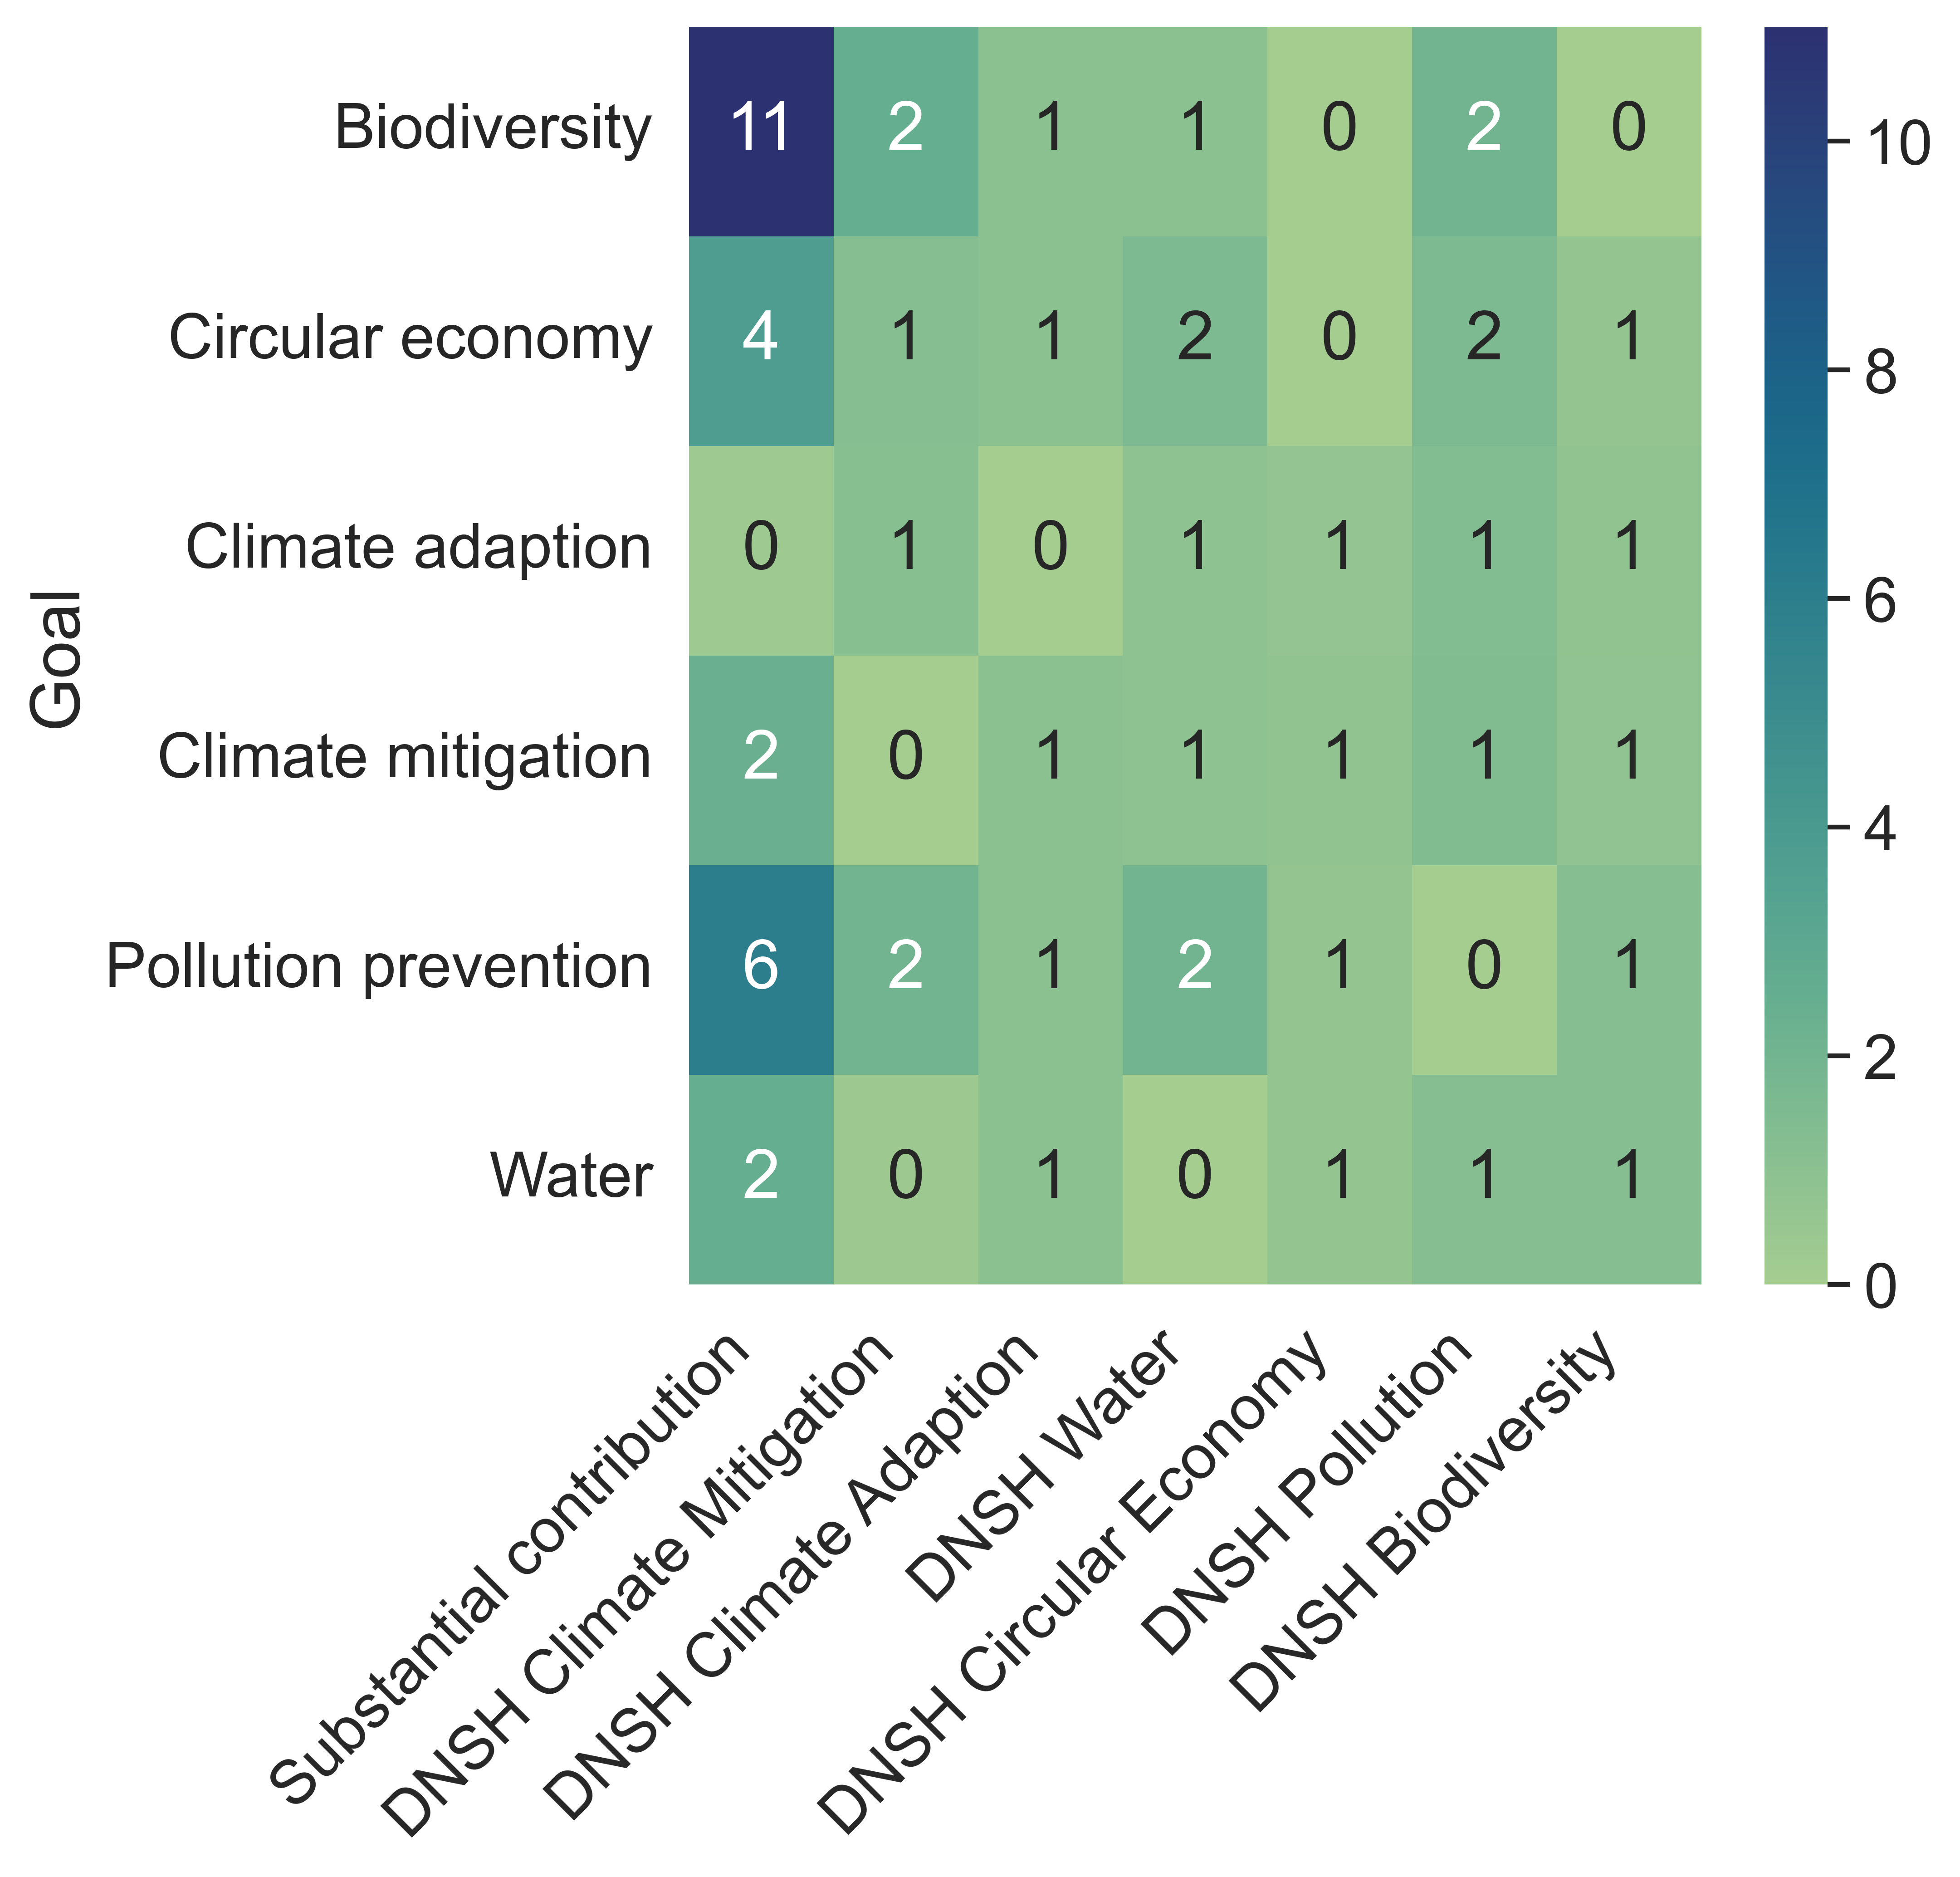

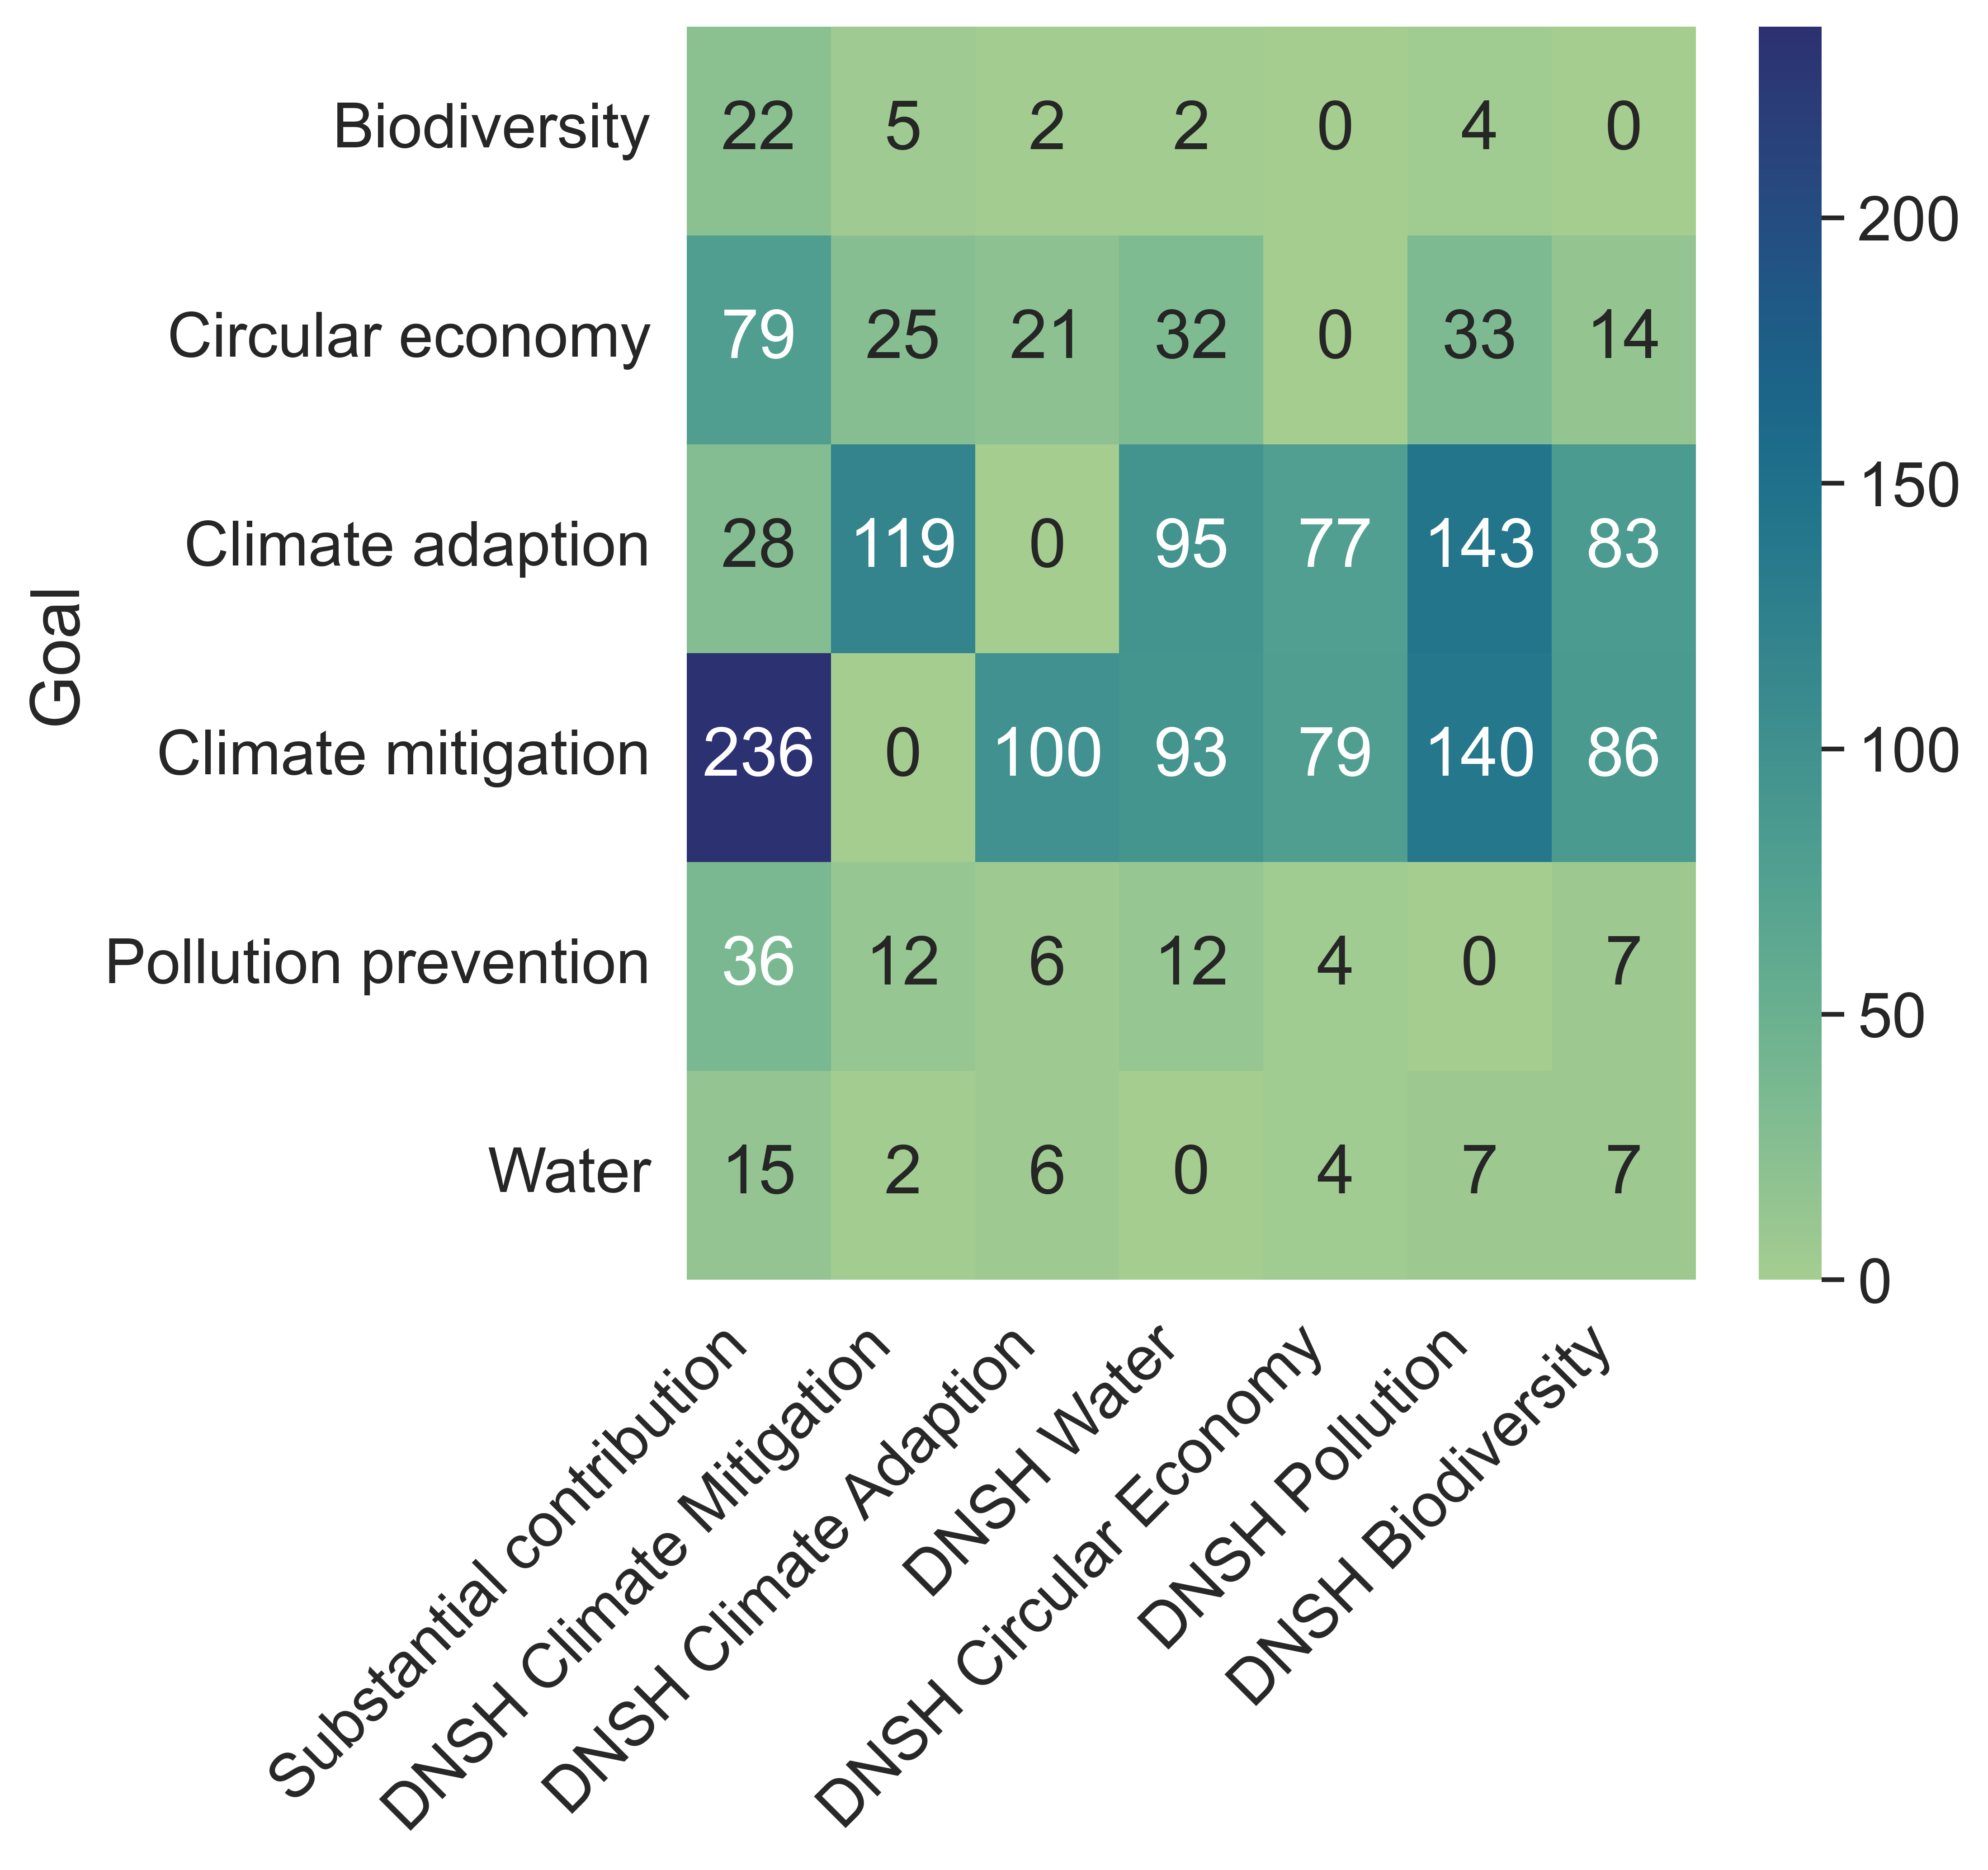

In [6]:
# Constraints per contribution type (substantial and resp. dnsh)

new_df = (
    concatinated_taxonomy.drop("nace", axis=1)
    .drop("sector", axis=1)
    .drop("activity", axis=1)
    .drop("number", axis=1)
)

substantial_cols = [
    "substantial_control_flow_between",
    "substantial_control_flow_within", # this is actually referring to activity existence constraint
    "substantial_temporal_between",
    "substantial_temporal_within",
    "substantial_resource_between",
    "substantial_resource_within",
    "substantial_data_between",
    "substantial_data_within",
    "substantial_no_process_relation"
]
new_df["Substantial contribution"] = new_df[substantial_cols].sum(axis=1)
new_df = new_df.drop(substantial_cols, axis=1)

mitigation = [
"mitigation_control_flow_between",
"mitigation_control_flow_within", # this is actually referring to activity existence constraint
"mitigation_temporal_between",
"mitigation_temporal_within",
"mitigation_resource_between",
"mitigation_resource_within",
"mitigation_data_between",
"mitigation_data_within",
"mitigation_no_process_relation"
]
new_df["DNSH Climate Mitigation"] = new_df[mitigation].sum(axis=1)
new_df = new_df.drop(mitigation, axis=1)

adaption = [
"adaption_control_flow_between",
"adaption_control_flow_within", # this is actually referring to activity existence constraint
"adaption_temporal_between",
"adaption_temporal_within",
"adaption_resource_between",
"adaption_resource_within",
"adaption_data_between",
"adaption_data_within",
"adaption_no_process_relation"
]
new_df["DNSH Climate Adaption"] = new_df[adaption].sum(axis=1)
new_df = new_df.drop(adaption, axis=1)


water = [
"water_control_flow_between",
"water_control_flow_within", # this is actually referring to activity existence constraint
"water_temporal_between",
"water_temporal_within",
"water_resource_between",
"water_resource_within",
"water_data_between",
"water_data_within",
"water_no_process_relation"
]
new_df["DNSH Water"] = new_df[water].sum(axis=1)
new_df = new_df.drop(water, axis=1)

circular = [
"circular_control_flow_between",
"circular_control_flow_within", # this is actually referring to activity existence constraint
"circular_temporal_between",
"circular_temporal_within",
"circular_resource_between",
"circular_resource_within",
"circular_data_between",
"circular_data_within",
"circular_no_process_relation"
]
new_df["DNSH Circular Economy"] = new_df[circular].sum(axis=1)
new_df = new_df.drop(circular, axis=1)

pollution = [
"pollution_control_flow_between",
"pollution_control_flow_within", # this is actually referring to activity existence constraint
"pollution_temporal_between",
"pollution_temporal_within",
"pollution_resource_between",
"pollution_resource_within",
"pollution_data_between",
"pollution_data_within",
"pollution_no_process_relation"
]
new_df["DNSH Pollution"] = new_df[pollution].sum(axis=1)
new_df = new_df.drop(pollution, axis=1)

biodiversity = [
"biodiversity_control_flow_between",
"biodiversity_control_flow_within", # this is actually referring to activity existence constraint
"biodiversity_temporal_between",
"biodiversity_temporal_within",
"biodiversity_resource_between",
"biodiversity_resource_within",
"biodiversity_data_between",
"biodiversity_data_within",
"biodiversity_no_process_relation"
]
new_df["DNSH Biodiversity"] = new_df[biodiversity].sum(axis=1)
new_df = new_df.drop(biodiversity, axis=1)

new_df = new_df.rename(columns={"goal": "Goal"})

mean_df = new_df.groupby("Goal").mean()
sum_df = new_df.groupby("Goal").sum()

# figsize=(6, 6) control width and height
# dpi = 600, I 
plt.figure(figsize=(6, 6), 
           dpi = 600) 

plot_mean=sns.heatmap(mean_df, cmap="crest", annot=True, fmt="0.0f")
plot_mean=plot_mean.set_xticklabels(plot_mean.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

plt.savefig("constraint_categories_per_goal_mean.png")

plt.figure(figsize=(6, 6), 
           dpi = 600) 

plot_sum=sns.heatmap(sum_df, cmap="crest", annot=True, fmt="0.0f")
plot_sum=plot_sum.set_xticklabels(plot_sum.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

plt.savefig("constraint_categories_per_goal.png")
